[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/upm-classes/image-understanding-2021-2022/blob/main/02_digital_image.ipynb)

### Initial steps

In [ ]:
# Linking my drive account to colab
from google.colab import drive
drive.mount('/content/drive')

In [27]:
# For performance issues, it is recomended to copy the things from drive to colab
!cp -r drive/MyDrive/image_mining_2021_2022 .

### How to open an image

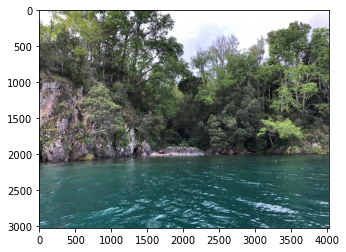

In [29]:
# Using opencv library
from cv2 import imread
import matplotlib.pyplot as plt # it is use to plot image

im = imread('./image_mining_2021_2022/images/pucon.jpg') # It opens images as BGR instead of RGB

plt.imshow(im[:,:,[2,1,0]]) # We need to change the order of the channels
plt.show()

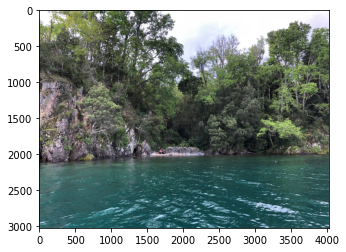

In [30]:
# Using scikit-image library
from skimage.io import imread
import matplotlib.pyplot as plt # it is use to plot image

im = imread('./image_mining_2021_2022/images/pucon.jpg')

plt.imshow(im)
plt.show()

### Characteristics of an image

In [31]:
import numpy as np
# Using scikit-image library
from skimage.io import imread
import matplotlib.pyplot as plt # it is use to plot image

def brightness(im):
    """ Function to estimate the average light intensity.
    """
    im = im / 255
    b = np.sum(im) / (im.shape[0] * im.shape[1])
    return b * 255

def contrast(im):
    """ Function to estimate the difference in intensities.
    """
    im = im / 255
    b = brightness(im)
    c = np.sum(np.square(im - b)) / (im.shape[0] * im.shape[1])
    return c * 255


In [33]:
im = imread('./image_mining_2021_2022/images/pucon.jpg')
height, width, channels = im.shape

print('Image Size: {} x {}'.format(height, width))
print('Number of channels: {}'.format(channels))
print('Max intensity: {}'.format(['channel {}: {}'.format(band + 1, np.max(im[:,:,band])) 
                                  for band in range(im.shape[2])]))
print('Min intensity: {}'.format(['channel {}: {}'.format(band + 1, np.min(im[:,:,band])) 
                                  for band in range(im.shape[2])]))
print('Brightness: {}'.format(['channel {}: {:0.2f}'.format(band + 1, brightness(im[:,:,band])) 
                               for band in range(im.shape[2])]))
print('Contrast: {}'.format(['channel {}: {:0.2f}'.format(band + 1, contrast(im[:,:,band])) 
                             for band in range(im.shape[2])]))

Image Size: 3024 x 4032
Number of channels: 3
Max intensity: ['channel 1: 255', 'channel 2: 255', 'channel 3: 255']
Min intensity: ['channel 1: 0', 'channel 2: 0', 'channel 3: 0']
Brightness: ['channel 1: 89.28', 'channel 2: 105.95', 'channel 3: 99.37']
Contrast: ['channel 1: 17.96', 'channel 2: 15.16', 'channel 3: 16.45']


### Histogram

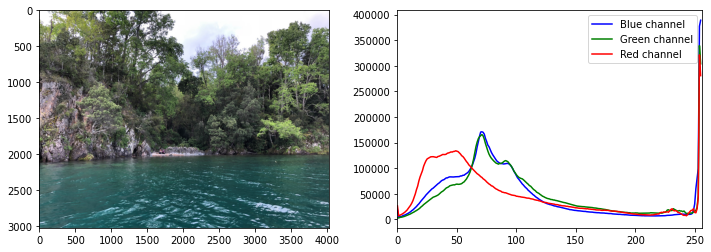

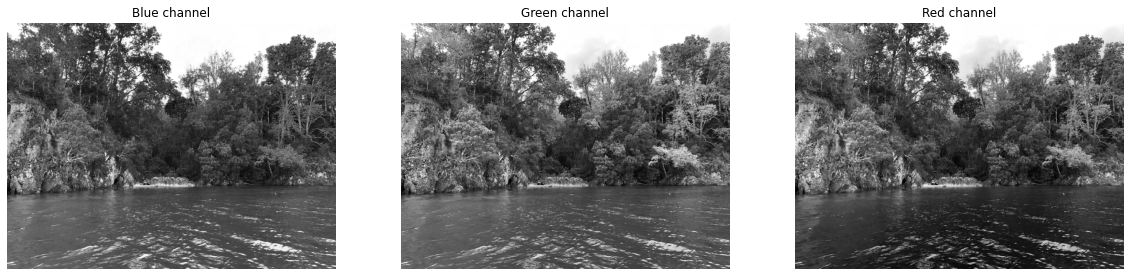

In [35]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('./image_mining_2021_2022/images/pucon.jpg')

plt.figure(figsize=(12,4))

# Subplot image
plt.subplot(121)
plt.imshow(img[:,:,[2,1,0]])

# Subplot histogram
plt.subplot(122)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.legend(('Blue channel','Green channel','Red channel'))
plt.show()

colors = ['Blue channel','Green channel','Red channel']
fig = plt.figure(figsize=(20,10))
for i in range(img.shape[2]):
    ax = fig.add_subplot(1, img.shape[2], i+1)
    ax.set_title(colors[i])
    ax.axis('off')
    ax.imshow(img[:,:,i], cmap='gray')
plt.show()

### Metadata

In [36]:
from PIL import Image
from PIL.ExifTags import GPSTAGS
from PIL.ExifTags import TAGS
import json

def get_exif(filename):
    """ Function to get metadata.
    """
    image = Image.open(filename)
    image.verify()
    return image._getexif()

def get_labeled_exif(exif):
    """ Function to get metadata as a dictionary omitting 'MakerNote' tag (iphone).
    """
    labeled = {}
    for (key, val) in exif.items():
        if TAGS.get(key) != 'MakerNote': # Avoid marker note of iphone
            labeled[TAGS.get(key)] = val
    return labeled

def get_geotagging(exif):
    """ Function to get geospatial metadata.
    """
    if not exif:
        raise ValueError("No EXIF metadata found")
    geotagging = {}
    for (idx, tag) in TAGS.items():
        if tag == 'GPSInfo':
            if idx not in exif:
                raise ValueError("No EXIF geotagging found")

            for (key, val) in GPSTAGS.items():
                if key in exif[idx]:
                    geotagging[val] = exif[idx][key]
    return geotagging

def get_decimal_from_dms(dms, ref):
    """ Function to convert dms (decimal, minute, second) coordinates 
        to decimal coordinates.
    """
    degrees = dms[0][0] / dms[0][1]
    minutes = dms[1][0] / dms[1][1] / 60.0
    seconds = dms[2][0] / dms[2][1] / 3600.0
    if ref in ['S', 'W']:
        degrees = -degrees
        minutes = -minutes
        seconds = -seconds
    return round(degrees + minutes + seconds, 5) 

def get_coordinates(geotags):
    """ Function to get spatial coordinates.
    """
    lat = get_decimal_from_dms(geotags['GPSLatitude'], geotags['GPSLatitudeRef'])

    lon = get_decimal_from_dms(geotags['GPSLongitude'], geotags['GPSLongitudeRef'])
    return (lat,lon) 

In [37]:
exif = get_exif('./image_mining_2021_2022/images/pucon.jpg') 

metadata = get_labeled_exif(exif) # obtain metadata
metadata

{'ApertureValue': (54823, 32325),
 'BrightnessValue': (307553, 48482),
 'ColorSpace': 1,
 'ComponentsConfiguration': b'\x01\x02\x03\x00',
 'CustomRendered': 2,
 'DateTime': '2018:11:03 18:25:26',
 'DateTimeDigitized': '2018:11:03 18:25:26',
 'DateTimeOriginal': '2018:11:03 18:25:26',
 'ExifImageHeight': 3024,
 'ExifImageWidth': 4032,
 'ExifOffset': 194,
 'ExifVersion': b'0221',
 'ExposureBiasValue': (0, 1),
 'ExposureMode': 0,
 'ExposureProgram': 2,
 'ExposureTime': (1, 131),
 'FNumber': (9, 5),
 'Flash': 16,
 'FlashPixVersion': b'0100',
 'FocalLength': (399, 100),
 'FocalLengthIn35mmFilm': 28,
 'GPSInfo': {1: 'S',
  2: ((39, 1), (29, 1), (5679, 100)),
  3: 'W',
  4: ((72, 1), (9, 1), (152, 100)),
  5: b'\x00',
  6: (1843671, 9116),
  12: 'K',
  13: (49397, 13051),
  16: 'T',
  17: (726597, 2050),
  23: 'T',
  24: (726597, 2050),
  31: (16, 1)},
 'ISOSpeedRatings': 20,
 'LensMake': 'Apple',
 'LensModel': 'iPhone 8 back camera 3.99mm f/1.8',
 'LensSpecification': ((4183519, 1048501), (4

In [38]:
# Get coordinates from picture
geotags = get_geotagging(exif)
coordinates = get_coordinates(geotags) 

print('Coordinates. Latitude: {}, Longitude: {}'.format(coordinates[1], coordinates[0]))

Coordinates. Latitude: -72.15042, Longitude: -39.49911


### Color Spaces

In [39]:
from skimage.color import rgb2lab, rgb2hsv
from skimage.io import imread
import matplotlib.pyplot as plt 

#### RGB color space

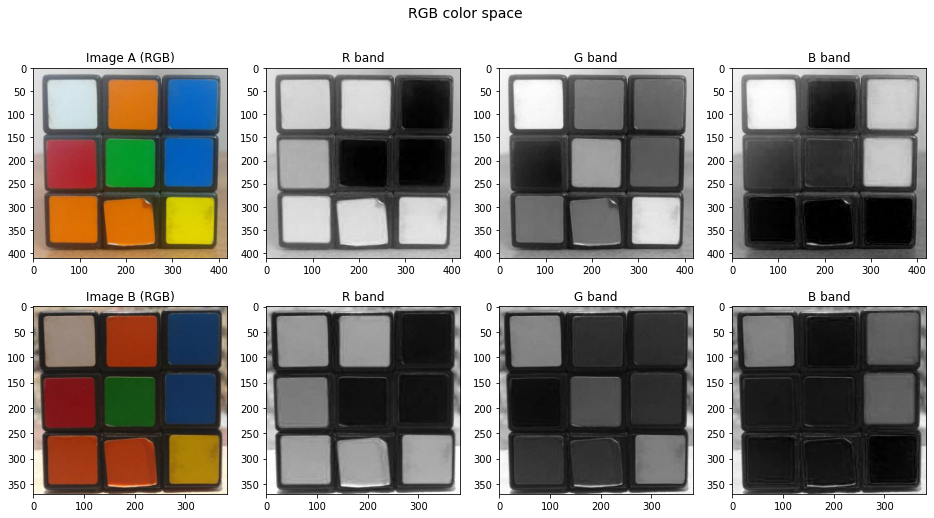

In [40]:
im1 = imread('./image_mining_2021_2022/images/rub07.jpg')
im2 = imread('./image_mining_2021_2022/images/rub09.jpg')

# Ploting images
fig = plt.figure(figsize=(16, 8))
fig.suptitle('RGB color space', fontsize=14)

plt.subplot(241)
plt.imshow(im1)
plt.title('Image A (RGB)')

plt.subplot(242)
plt.imshow(im1[:,:,0], cmap='gray')
plt.title('R band')

plt.subplot(243)
plt.imshow(im1[:,:,1], cmap='gray')
plt.title('G band')

plt.subplot(244)
plt.imshow(im1[:,:,2], cmap='gray')
plt.title('B band')

plt.subplot(245)
plt.imshow(im2)
plt.title('Image B (RGB)')

plt.subplot(246)
plt.imshow(im2[:,:,0], cmap='gray')
plt.title('R band')

plt.subplot(247)
plt.imshow(im2[:,:,1], cmap='gray')
plt.title('G band')

plt.subplot(248)
plt.imshow(im2[:,:,2], cmap='gray')
plt.title('B band')

plt.show()

#### HSV color space

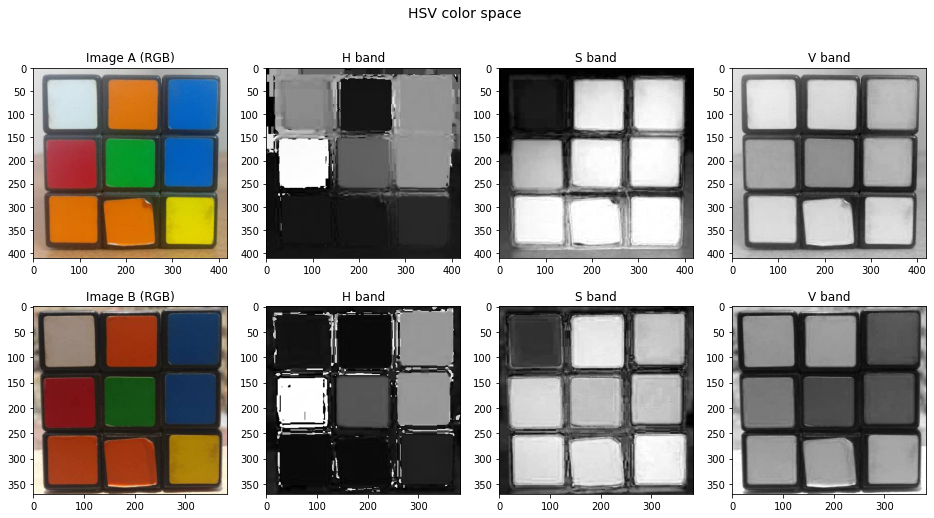

In [41]:
im1 = imread('./image_mining_2021_2022/images/rub07.jpg')
im2 = imread('./image_mining_2021_2022/images/rub09.jpg')

im1_hsv = rgb2hsv(im1)
im2_hsv = rgb2hsv(im2)

# Ploting images
fig = plt.figure(figsize=(16, 8))
fig.suptitle('HSV color space', fontsize=14)

plt.subplot(241)
plt.imshow(im1)
plt.title('Image A (RGB)')

plt.subplot(242)
plt.imshow(im1_hsv[:,:,0], cmap='gray')
plt.title('H band')

plt.subplot(243)
plt.imshow(im1_hsv[:,:,1], cmap='gray')
plt.title('S band')

plt.subplot(244)
plt.imshow(im1_hsv[:,:,2], cmap='gray')
plt.title('V band')

plt.subplot(245)
plt.imshow(im2)
plt.title('Image B (RGB)')

plt.subplot(246)
plt.imshow(im2_hsv[:,:,0], cmap='gray')
plt.title('H band')

plt.subplot(247)
plt.imshow(im2_hsv[:,:,1], cmap='gray')
plt.title('S band')

plt.subplot(248)
plt.imshow(im2_hsv[:,:,2], cmap='gray')
plt.title('V band')

plt.show()

#### CIELab color space

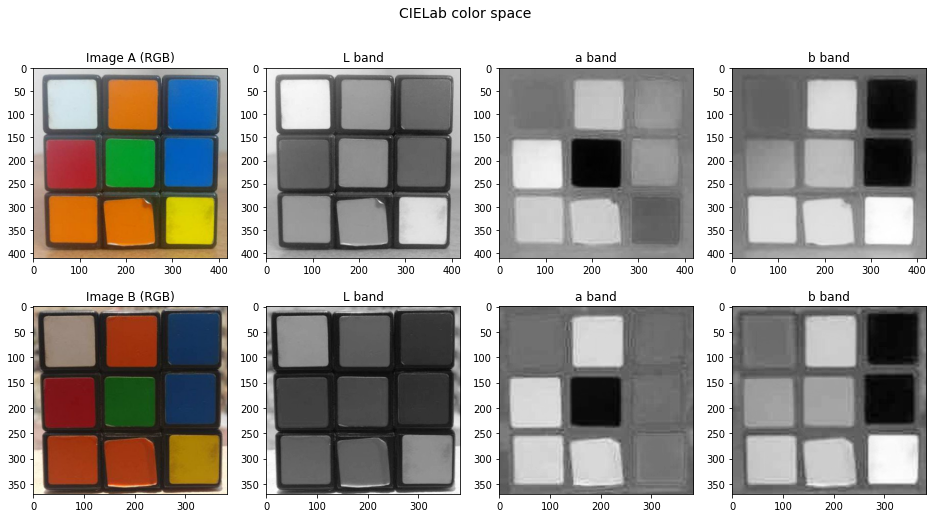

In [42]:
im1 = imread('./image_mining_2021_2022/images/rub07.jpg')
im2 = imread('./image_mining_2021_2022/images/rub09.jpg')

im1_lab = rgb2lab(im1)
im2_lab = rgb2lab(im2)

# Ploting images
fig = plt.figure(figsize=(16, 8))
fig.suptitle('CIELab color space', fontsize=14)

plt.subplot(241)
plt.imshow(im1)
plt.title('Image A (RGB)')

plt.subplot(242)
plt.imshow(im1_lab[:,:,0], cmap='gray')
plt.title('L band')

plt.subplot(243)
plt.imshow(im1_lab[:,:,1], cmap='gray')
plt.title('a band')

plt.subplot(244)
plt.imshow(im1_lab[:,:,2], cmap='gray')
plt.title('b band')

plt.subplot(245)
plt.imshow(im2)
plt.title('Image B (RGB)')

plt.subplot(246)
plt.imshow(im2_lab[:,:,0], cmap='gray')
plt.title('L band')

plt.subplot(247)
plt.imshow(im2_lab[:,:,1], cmap='gray')
plt.title('a band')

plt.subplot(248)
plt.imshow(im2_lab[:,:,2], cmap='gray')
plt.title('b band')

plt.show()